Importing Libraries

In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy import sparse
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
sns.set()

Loading the dataset

In [285]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Getting some information about the dataset

In [286]:
df.shape

(32561, 15)

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [288]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Identifying null values

In [289]:
df.replace('?', np.nan, inplace = True)

In [290]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [291]:
df.apply(pd.isnull).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

Handling missing values by removing them

In [292]:
df.dropna(subset = ['workclass', 'occupation', 'native.country'], inplace = True)

In [293]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [294]:
df.shape

(30162, 15)

Finding duplicated data in the dataset

In [295]:
print(df.duplicated().sum())

23


Removing duplicated data in the dataset

In [296]:
df.drop_duplicates(inplace = True)

In [297]:
print(df.duplicated().sum())

0


In [298]:
df.shape

(30139, 15)

In [299]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [300]:
df.reset_index(drop = True, inplace = True)

In [301]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [302]:
categorical_columns = ['workclass', 'education', 'education.num', 'marital.status', 'occupation', 'relationship',
                       'race', 'sex', 'native.country', 'income']

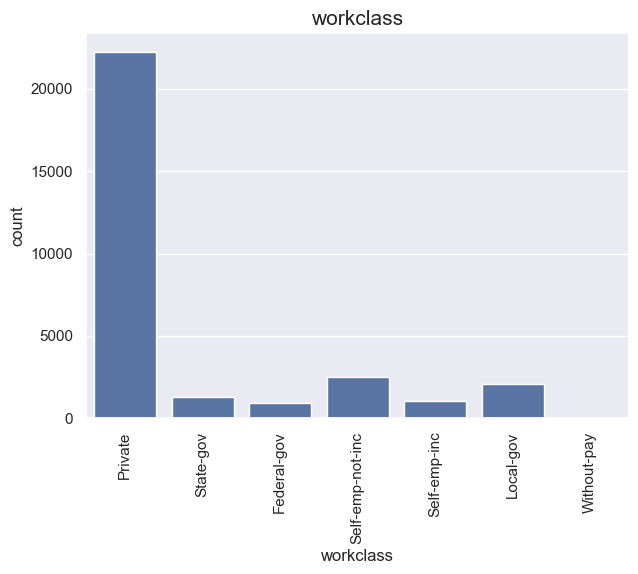

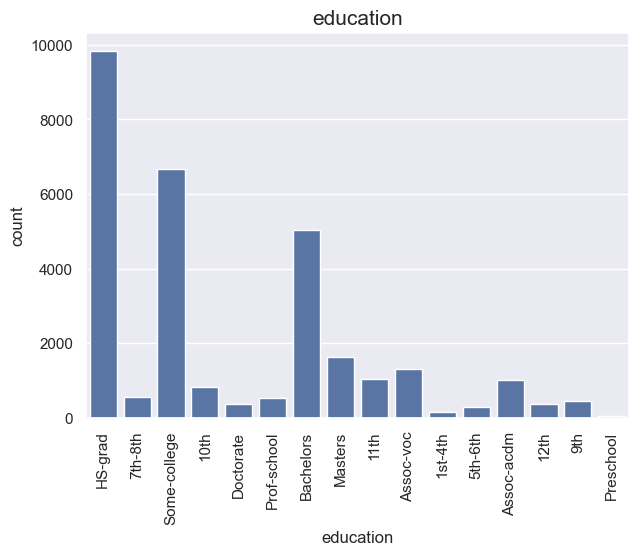

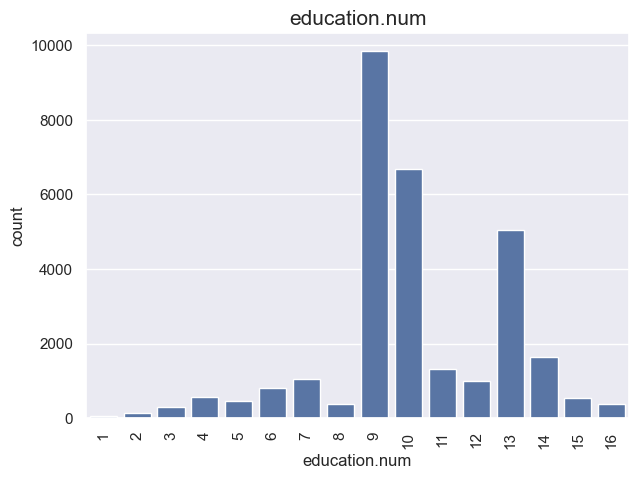

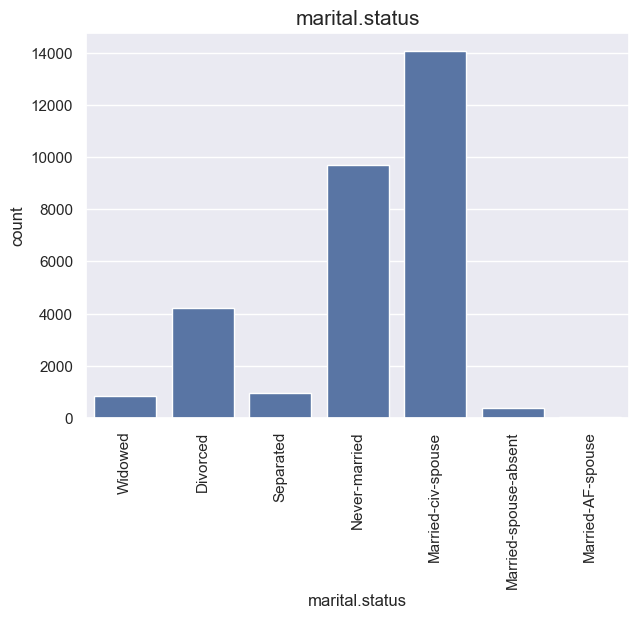

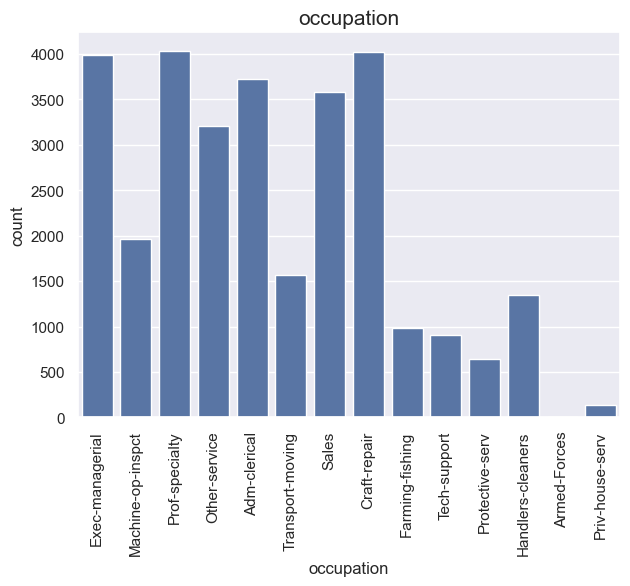

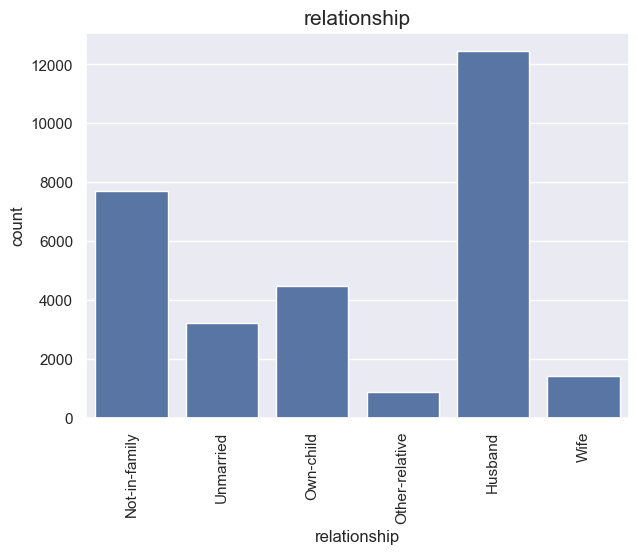

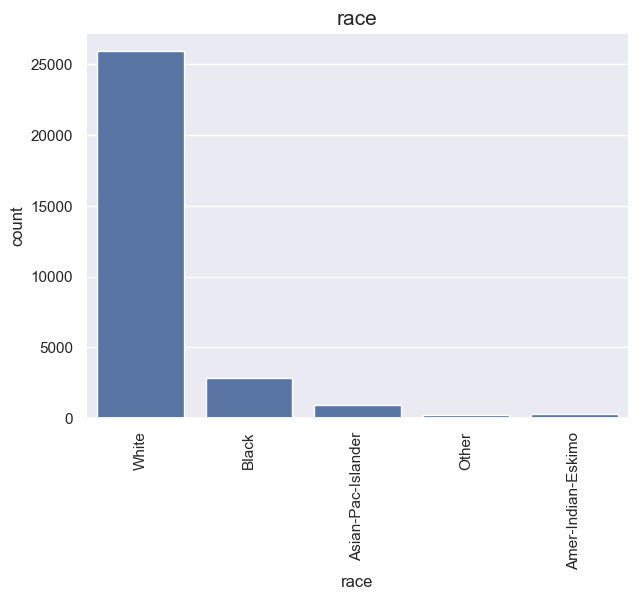

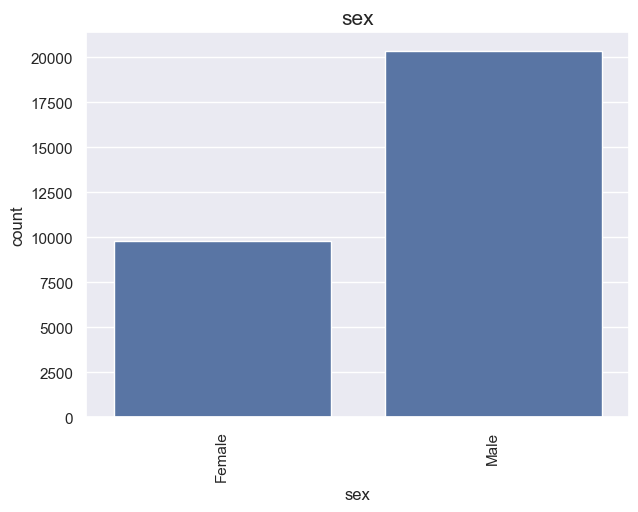

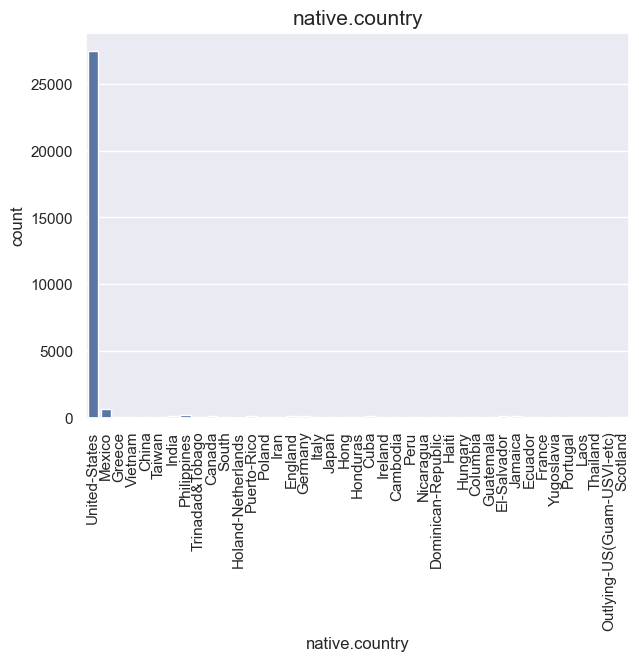

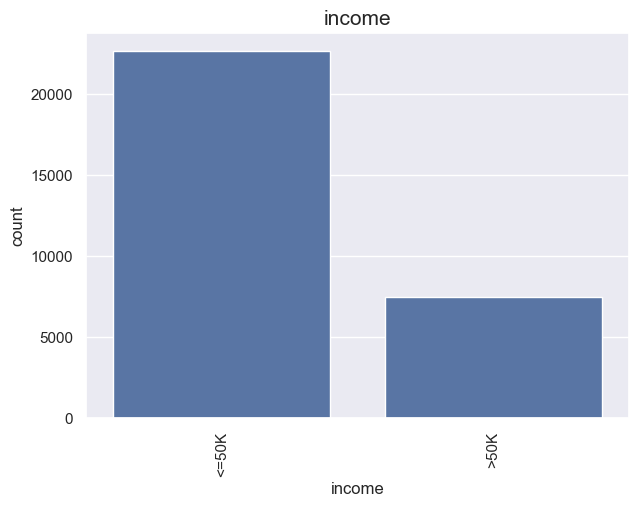

In [303]:
for column in categorical_columns:
    plt.figure(figsize = (7, 5))
    sns.countplot(data = df, x = column)
    plt.title(column, fontsize = 15)
    plt.xticks(rotation = 90)
    plt.show()

In [304]:
for column in categorical_columns:
    print(df[column].value_counts())
    print('=============================================')

workclass
Private             22264
Self-emp-not-inc     2498
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: count, dtype: int64
education
HS-grad         9834
Some-college    6669
Bachelors       5042
Masters         1626
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          556
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          287
1st-4th          149
Preschool         44
Name: count, dtype: int64
education.num
9     9834
10    6669
13    5042
14    1626
11    1307
7     1048
12    1008
6      820
4      556
15     542
5      455
8      377
16     375
3      287
2      149
1       44
Name: count, dtype: int64
marital.status
Married-civ-spouse       14059
Never-married             9711
Divorced                  4212
Separated                  939
Widowed                    827
Married-spouse-absent   

In [305]:
df.shape

(30139, 15)

In [306]:
df = df[df['workclass'] != 'Without-pay']

In [307]:
df = df[df['education'] != 'Preschool']

In [308]:
df = df[df['education.num'] != 1]

In [309]:
df = df[df['marital.status'] != 'Married-AF-spouse']

In [310]:
df = df[df['occupation'] != 'Armed-Forces']

In [311]:
def native_country_rep(text):
    if text == 'United-States':
        return 'United-States'
    else:
        return 'Other'

In [312]:
df['native.country'] = df['native.country'].apply(native_country_rep)

In [313]:
df['native.country'].value_counts()

native.country
United-States    27429
Other             2622
Name: count, dtype: int64

In [314]:
df.shape

(30051, 15)

A statistical look at numerical data

In [315]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,30051.000000,3.005100e+04,30051.000000,30051.000000,30051.000000,30051.000000
mean,38.440418,1.897275e+05,10.136368,1094.046621,88.523277,40.942697
std,13.124473,1.056095e+05,2.527540,7415.959646,404.664392,11.967429
min,17.000000,1.376900e+04,2.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176120e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783830e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.374535e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [316]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [317]:
for column in categorical_columns:
    print(f'{column} : {df[column].nunique()}')
    print('========================================')

workclass : 6
education : 15
education.num : 15
marital.status : 6
occupation : 13
relationship : 6
race : 5
sex : 2
native.country : 2
income : 2


In [318]:
pd.crosstab(df['workclass'], df['education'])

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Prof-school,Some-college
workclass,,,,,,,,,,,,,,,
Federal-gov,6,9,4,0,1,2,3,55,38,205,15,255,64,26,248
Local-gov,31,36,19,4,8,27,23,86,85,470,26,498,336,29,385
Private,686,917,319,131,252,413,380,719,992,3451,172,7663,862,247,5006
Self-emp-inc,19,13,6,1,3,10,9,35,37,259,33,270,77,79,223
Self-emp-not-inc,65,59,18,12,19,93,34,70,108,386,46,856,120,130,480
State-gov,13,14,10,1,4,10,6,41,46,266,83,267,166,31,319


In [319]:
pd.crosstab(df['workclass'], df['marital.status'])

marital.status,Divorced,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
workclass,,,,,,
Federal-gov,166,459,11,234,25,36
Local-gov,363,1012,21,521,60,86
Private,3090,9530,282,7993,740,575
Self-emp-inc,98,802,4,122,20,28
Self-emp-not-inc,285,1654,31,401,52,73
State-gov,209,575,17,409,41,26


In [320]:
pd.crosstab(df['workclass'], df['occupation'])

occupation,Adm-clerical,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
workclass,,,,,,,,,,,,,
Federal-gov,315,63,179,8,22,14,34,0,166,27,13,66,24
Local-gov,280,143,212,29,45,10,188,0,692,304,7,38,115
Private,2787,3136,2645,439,1253,1870,2646,139,2248,185,2894,722,1246
Self-emp-inc,28,99,385,51,2,10,27,0,157,5,281,3,26
Self-emp-not-inc,49,521,383,430,15,35,173,0,364,6,376,26,118
State-gov,250,55,186,15,9,13,122,0,403,116,11,56,41


In [321]:
pd.crosstab(df['workclass'], df['relationship'])

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
workclass,,,,,,
Federal-gov,417,271,19,62,123,39
Local-gov,849,511,40,211,299,153
Private,8390,5870,745,3808,2426,971
Self-emp-inc,756,164,7,56,49,42
Self-emp-not-inc,1518,505,49,152,153,119
State-gov,501,370,22,160,157,67


In [322]:
pd.crosstab(df['workclass'], df['race'])

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
workclass,,,,,
Federal-gov,18,40,167,6,700
Local-gov,36,39,281,6,1701
Private,190,648,2095,202,19075
Self-emp-inc,2,39,23,4,1006
Self-emp-not-inc,24,67,87,7,2311
State-gov,15,54,156,4,1048


In [323]:
pd.crosstab(df['workclass'], df['sex'])

sex,Female,Male
workclass,,
Federal-gov,307,624
Local-gov,821,1242
Private,7613,14597
Self-emp-inc,126,948
Self-emp-not-inc,392,2104
State-gov,483,794


In [324]:
pd.crosstab(df['workclass'], df['native.country'])

native.country,Other,United-States
workclass,,
Federal-gov,57,874
Local-gov,111,1952
Private,2116,20094
Self-emp-inc,83,991
Self-emp-not-inc,186,2310
State-gov,69,1208


In [325]:
pd.crosstab(df['workclass'], df['income'])

income,<=50K,>50K
workclass,,
Federal-gov,569,362
Local-gov,1454,609
Private,17343,4867
Self-emp-inc,474,600
Self-emp-not-inc,1783,713
State-gov,933,344


In [326]:
pd.pivot_table(data = df, index = 'marital.status', columns = 'education.num', values = 'age')

education.num,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
marital.status,,,,,,,,,,,,,,,
Divorced,61.875000,52.277778,49.048387,46.423077,43.792453,41.403361,40.555556,42.172840,42.323213,40.446429,40.771574,44.108738,47.183406,43.773585,49.625000
Married-civ-spouse,46.630137,44.873239,49.747634,44.600939,45.529052,41.840979,42.107143,42.279483,41.856075,40.646970,40.370455,42.322816,44.736451,45.963731,48.073643
Married-spouse-absent,38.200000,42.650000,50.615385,36.666667,42.000000,33.125000,37.857143,39.222222,36.478261,39.300000,45.600000,42.385965,47.666667,51.000000,46.800000
Never-married,31.200000,30.765432,34.010000,28.248175,24.474916,22.391389,23.148515,28.691427,26.173570,30.026239,29.490323,30.563158,37.902887,36.238636,41.119403
Separated,48.714286,43.722222,38.470588,43.925926,41.128205,36.604651,36.700000,38.486631,38.490476,41.125000,39.633333,41.047059,42.652174,44.000000,42.857143
Widowed,60.875000,65.875000,62.891304,61.058824,58.647059,55.062500,61.222222,58.191304,56.735099,59.827586,47.684211,53.676056,57.000000,55.600000,65.666667


In [327]:
pd.pivot_table(data = df, index = 'race', columns = 'income', values = 'age')

income,<=50K,>50K
race,,
Amer-Indian-Eskimo,36.402390,39.411765
Asian-Pac-Islander,35.890454,42.500000
Black,36.990589,43.698630
Other,32.620192,41.809524
White,36.620701,44.074703


In [328]:
le = LabelEncoder()

In [329]:
df['income'].value_counts()

income
<=50K    22556
>50K      7495
Name: count, dtype: int64

In [330]:
df['income'] = le.fit_transform(df['income'])

In [331]:
df['income'].value_counts()

income
0    22556
1     7495
Name: count, dtype: int64

In [332]:
df.corr(numeric_only = True)['income']

age               0.243167
fnlwgt           -0.008592
education.num     0.335511
capital.gain      0.221494
capital.loss      0.150018
hours.per.week    0.229726
income            1.000000
Name: income, dtype: float64

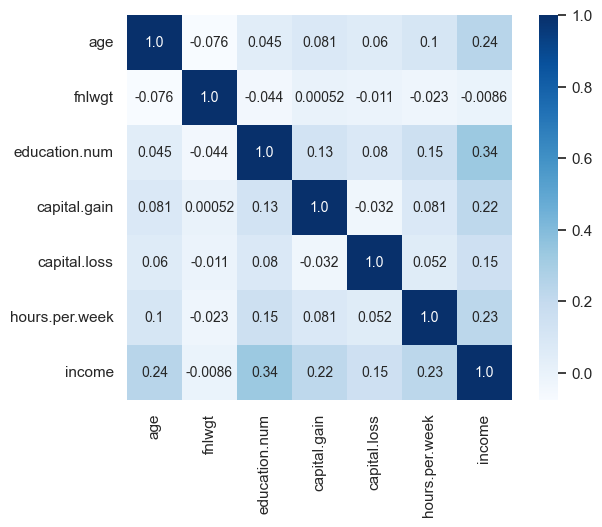

In [333]:
plt.figure(figsize = (7, 5))
sns.heatmap(df.corr(numeric_only = True), annot = True, square = True, cbar = True, annot_kws = {'size': 10}, fmt = '.2', cmap = 'Blues')
plt.show()

Removing irrelevant feature

In [334]:
df.drop(columns = ['fnlwgt'], axis = 1, inplace = True)

In [335]:
df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
1,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
2,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
3,34,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
4,38,Private,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0


Separating dependent and independent features

In [336]:
X = df.drop(columns = ['income'], axis = 1)
y = df['income']

In [337]:
X.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
1,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
2,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States
3,34,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States
4,38,Private,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States


In [338]:
y

0        0
1        0
2        0
3        0
4        0
        ..
30134    0
30135    0
30136    1
30137    0
30138    0
Name: income, Length: 30051, dtype: int64

In [339]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101, shuffle = True, stratify = y)

Scalling and OneHotEncoding

In [340]:
ct = ColumnTransformer(transformers = [('scaler', StandardScaler(), [0, 3, 9, 10, 11]), 
                                       ('encoder', OneHotEncoder(drop = 'first', dtype = 'int32'), [1, 2, 4, 5, 6, 7, 8, 12])],
                       remainder = 'passthrough')

In [341]:
clf = Pipeline([('ct', ct),
                ('lr', LogisticRegression())])

In [342]:
clf.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  [0, 3, 9, 10, 11]),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                dtype='int32'),
                                                  [1, 2, 4, 5, 6, 7, 8, 12])])),
                ('lr', LogisticRegression())])

In [343]:
y_pred = clf.predict(X_test)

In [344]:
y_pred[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [345]:
y_test[:10]

28516    1
27664    0
10326    1
4010     1
12949    1
11270    0
4281     0
29691    0
19692    0
30089    0
Name: income, dtype: int64

In [346]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4512
           1       0.76      0.62      0.68      1499

    accuracy                           0.85      6011
   macro avg       0.82      0.78      0.79      6011
weighted avg       0.85      0.85      0.85      6011



In [347]:
X_num = pd.get_dummies(data = X, columns = ['workclass', 'education', 'marital.status', 'occupation', 'relationship',
                                            'race', 'sex', 'native.country'], drop_first = True, dtype = 'int32')

In [348]:
X_num

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native.country_United-States
0,82,9,0,4356,18,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,54,4,0,3900,40,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
2,41,10,0,3900,40,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,34,9,0,3770,45,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
4,38,6,0,3770,40,0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,22,10,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1
30135,27,12,0,0,38,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
30136,40,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1
30137,58,9,0,0,40,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1


In [349]:
scaler = StandardScaler()

In [350]:
cols = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

In [351]:
X_num[cols] = scaler.fit_transform(X_num[cols])

In [352]:
X_num

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native.country_United-States
0,3.319014,-0.449602,-0.147528,10.545894,-1.917127,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,1.185559,-2.427843,-0.147528,9.419015,-0.078773,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
2,0.195027,-0.053954,-0.147528,9.419015,-0.078773,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,-0.338337,-0.449602,-0.147528,9.097756,0.339034,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
4,-0.033558,-1.636547,-0.147528,9.097756,-0.078773,0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,-1.252674,-0.053954,-0.147528,-0.218761,-0.078773,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1
30135,-0.871700,0.737343,-0.147528,-0.218761,-0.245896,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
30136,0.118832,-0.449602,-0.147528,-0.218761,-0.078773,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1
30137,1.490339,-0.449602,-0.147528,-0.218761,-0.078773,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1


In [353]:
smote = SMOTE(sampling_strategy = 'not majority')

In [354]:
X_sm, y_sm = smote.fit_resample(X_num, y)

In [355]:
len(X_sm)

45112

In [356]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 101, shuffle = True,
                                                                stratify = y_sm)

In [357]:
lr = LogisticRegression()

In [358]:
cvs = cross_val_score(lr, X_train_sm, y_train_sm, cv = 5)
print(cvs.mean())

0.8391476468713057


In [359]:
clf_rf = Pipeline([('ct' , ct),
                   ('rf', RandomForestClassifier())])

In [360]:
clf_rf.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  [0, 3, 9, 10, 11]),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                dtype='int32'),
                                                  [1, 2, 4, 5, 6, 7, 8, 12])])),
                ('rf', RandomForestClassifier())])

In [361]:
y_pred_rf = clf_rf.predict(X_test)

In [362]:
y_pred_rf[:10]

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [363]:
y_test[:10]

28516    1
27664    0
10326    1
4010     1
12949    1
11270    0
4281     0
29691    0
19692    0
30089    0
Name: income, dtype: int64

In [364]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4512
           1       0.72      0.64      0.68      1499

    accuracy                           0.85      6011
   macro avg       0.80      0.78      0.79      6011
weighted avg       0.84      0.85      0.84      6011



In [365]:
rf = RandomForestClassifier()

In [366]:
param_grid = {'n_estimators' : [70, 100, 120], 'max_depth' : [2, 4, 8], 'min_samples_split' : [2, 6, 10], 
              'min_samples_leaf' : [1, 4, 8]}

In [367]:
rsc = RandomizedSearchCV(rf, param_grid, cv = 5)

In [368]:
X_tr, X_te, y_tr, y_te = train_test_split(X_num, y, test_size = 0.2, random_state = 101, shuffle = True, stratify = y)

In [369]:
rsc.fit(X_tr, y_tr)

C:\Users\loptop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [2, 4, 8],
                                        'min_samples_leaf': [1, 4, 8],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [70, 100, 120]})

In [370]:
rsc.best_params_

{'n_estimators': 70,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_depth': 8}

In [371]:
clf_rf_2 = Pipeline([('ct', ct),
                     ('rf', RandomForestClassifier(n_estimators = 70, min_samples_split = 10, min_samples_leaf = 4,
                                                   max_depth = 8))])

In [372]:
clf_rf_2.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  [0, 3, 9, 10, 11]),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                dtype='int32'),
                                                  [1, 2, 4, 5, 6, 7, 8, 12])])),
                ('rf',
                 RandomForestClassifier(max_depth=8, min_samples_leaf=4,
                                        min_samples_split=10,
                                        n_estimators=70))])

In [373]:
y_pred_rf2 = clf_rf_2.predict(X_test)

In [374]:
y_pred_rf2[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [375]:
print(classification_report(y_test, y_pred_rf2))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4512
           1       0.81      0.56      0.66      1499

    accuracy                           0.86      6011
   macro avg       0.84      0.76      0.79      6011
weighted avg       0.85      0.86      0.85      6011



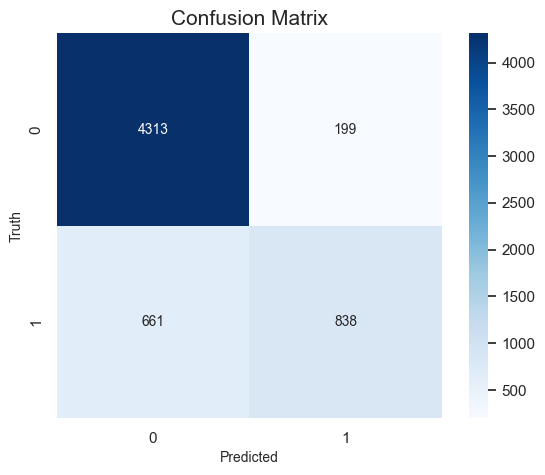

In [377]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf2), annot = True, square = True, cbar = True, annot_kws = {'size': 10}, fmt = 'd',
            cmap = 'Blues')
plt.title('Confusion Matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()